<a href="https://colab.research.google.com/github/zahraa57/Machine-Learning-1-Course-Project/blob/main/modeling_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random as rd
rd.seed(0)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR




# Preprocessing exploration 

In [3]:
data = pd.read_csv('/content/drive/MyDrive/data/data.csv')
data.head(5)

,image_name,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y466,y467,y468,pitch,yaw,roll,h,v,t,scale
0,image03233.jpg,0.539054,0.566098,0.538103,0.534302,0.567888,0.559214,0.529194,0.380115,0.520729,...,0.500340,0.485196,0.477088,-0.474087,-0.040907,0.019801,218.157730,280.057434,-113.012268,0.001805
1,image03255.jpg,0.572712,0.561157,0.543249,0.500813,0.553606,0.532301,0.469587,0.337372,0.435622,...,0.460982,0.428940,0.423490,-0.331991,-0.280685,-0.057327,183.341934,244.958817,-92.797005,0.001587
2,image03236.jpg,0.503842,0.488899,0.498043,0.468165,0.485042,0.482925,0.480913,0.358855,0.474047,...,0.491338,0.447866,0.437037,0.036318,-0.447323,-0.115917,178.802704,194.897919,-97.699074,0.001242
3,image03222.jpg,0.536512,0.554113,0.538082,0.528365,0.555925,0.551769,0.535769,0.370772,0.532781,...,0.500151,0.475350,0.468136,-0.116700,-0.233745,0.095809,197.981903,211.594971,-102.926636,0.001377
4,image03266.jpg,0.531321,0.521944,0.523811,0.491416,0.518149,0.512927,0.499565,0.343950,0.489164,...,0.495773,0.460554,0.450567,0.093373,0.062462,-0.125822,235.452881,180.535965,-118.137459,0.001704


In [4]:
data.shape

(1575, 944)

In [5]:
features = data.drop(["image_name","pitch","yaw","roll","h","v","t","scale"], axis=1)
labels = data[["pitch","yaw","roll"]]
labels=labels.round(decimals=2)

In [6]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,1575.0,0.504852,0.034772,0.259859,0.485347,0.505489,0.524401,0.635382
x2,1575.0,0.503546,0.046904,0.257272,0.473844,0.501813,0.532893,0.657480
x3,1575.0,0.504134,0.032818,0.263137,0.484511,0.503545,0.523151,0.625280
x4,1575.0,0.488201,0.039819,0.263422,0.461535,0.484968,0.512474,0.618590
x5,1575.0,0.503227,0.048452,0.258436,0.472391,0.501603,0.533754,0.655128
...,...,...,...,...,...,...,...,...
y464,1575.0,0.494728,0.017385,0.420034,0.483992,0.494495,0.505059,0.577777
y465,1575.0,0.500194,0.016312,0.426418,0.490668,0.500117,0.509826,0.577689
y466,1575.0,0.504369,0.016058,0.430643,0.495660,0.504007,0.513965,0.576777
y467,1575.0,0.482564,0.029018,0.393126,0.464498,0.482014,0.499401,0.625409


Explore different criteria of scaling and test pca effect


*   based on exploration choosed minmax and pca of 6 componnent




In [7]:
PCA_t=PCA(n_components=0.95)
features1=PCA_t.fit_transform(features)
features1.shape

(1575, 6)

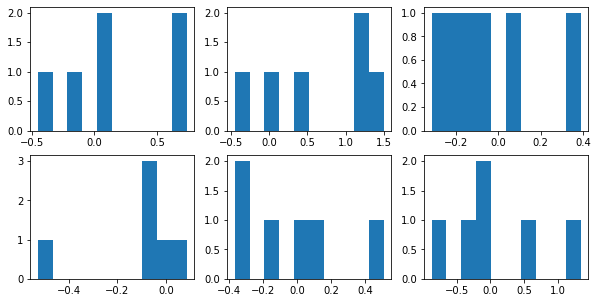

In [8]:
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features1[i])
  

In [9]:
features2= RobustScaler().fit_transform(features)
PCA1=PCA(n_components=0.95)
features2=PCA1.fit_transform(features2)

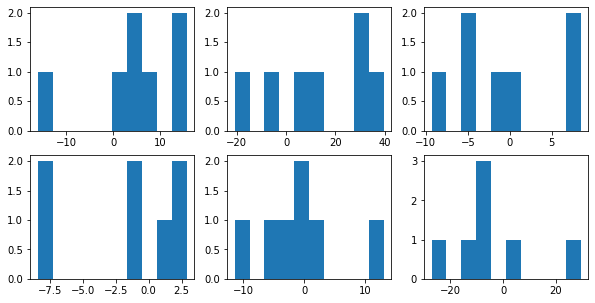

In [10]:
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features2[i])
  

In [11]:
pd.DataFrame(features2).describe()

,0,1,2,3,4,5,6
count,1.575000e+03,1.575000e+03,1.575000e+03,1.575000e+03,1.575000e+03,1.575000e+03,1.575000e+03
mean,2.165464e-16,-1.804553e-16,-7.218212e-17,-3.609106e-17,1.443642e-16,4.511382e-17,-3.609106e-17
std,1.451017e+01,1.168227e+01,1.144982e+01,1.017074e+01,5.800088e+00,5.494848e+00,4.201300e+00
min,-6.397112e+01,-3.506612e+01,-5.308094e+01,-4.666657e+01,-2.075875e+01,-1.987011e+01,-1.572280e+01
25%,-7.405003e+00,-8.020487e+00,-5.909720e+00,-5.697902e+00,-3.585275e+00,-3.452929e+00,-2.507831e+00
50%,3.225919e-01,-1.296301e+00,1.770765e+00,-3.487495e-01,-3.677203e-01,5.226294e-01,2.020175e-01
75%,7.315125e+00,6.214848e+00,6.705816e+00,5.055923e+00,3.309215e+00,3.583887e+00,2.742791e+00
max,9.266642e+01,1.047935e+02,5.865133e+01,8.236602e+01,7.075325e+01,2.289859e+01,1.701112e+01


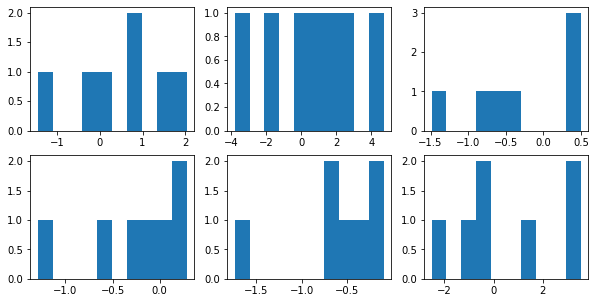

In [12]:
features3= MinMaxScaler().fit_transform(features)
PCA1=PCA(n_components=7)
features3=PCA1.fit_transform(features3)
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features3[i])
  

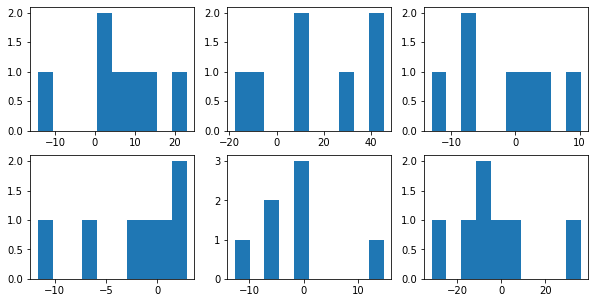

In [13]:
features4= StandardScaler().fit_transform(features)
PCA1=PCA(n_components=0.95)
features4=PCA1.fit_transform(features4)
fig = plt.figure(figsize=(10,5))
for i in  range(6):
    ax1 = fig.add_subplot(2,3,i+1)
    ax1.hist(features4[i])
  

In [14]:
features4.shape

(1575, 7)

In [15]:
features4[1]

array([ 45.27704475,  41.63771647, -17.71609174,  31.19812852,
        13.03508513,  10.89321602,  -8.62871127])

In [16]:
# face_points = features4
# features5 = []
# for i in range(7):
#   for j in range(i+1, 7):
#     features5.append(np.linalg.norm(face_points[i]-face_points[j]))
            
# x=np.array(features).reshape(1, -1)  
# x.shape 

In [17]:
labels.describe().T

,count,mean,std,min,25%,50%,75%,max
pitch,1575.0,-0.104203,0.523348,-12.46,-0.25,-0.12,0.04,3.42
yaw,1575.0,0.000660,0.634845,-6.13,-0.28,0.02,0.31,1.51
roll,1575.0,-0.018616,0.620718,-16.97,-0.17,-0.02,0.14,5.83


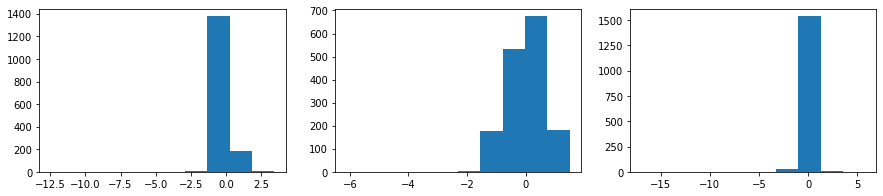

In [18]:
fig = plt.figure(figsize=(15,3))
i=0
for col in  labels.columns:
    ax1 = fig.add_subplot(1,3,i+1)
    ax1.hist(labels[col])
    i=i+1

In [19]:
features=features3

Explore different models

In [20]:
# remark: we fix random_state the end, to make sure we always get the same results
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.2, random_state=100)

In [21]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.1, random_state=100)

In [22]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

1260
283
32
1260
283
32


In [23]:
reg_model =MultiOutputRegressor( linear_model.LinearRegression())
reg_model.fit(features_train, labels_train)
print(reg_model.score(features_train, labels_train))
print("linrear regression:", reg_model.score(features_validation, labels_validation))

0.003375667581693905
linrear regression: -0.004659943186859842


In [24]:
ridge_model = MultiOutputRegressor(Ridge(random_state=42))
ridge_model.fit(features_train, labels_train)
print(ridge_model.score(features_train, labels_train))
print("ridge regression:", ridge_model.score(features_validation, labels_validation))

0.0033756637853259073
ridge regression: -0.004657397916333128


In [25]:
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf.fit(features_train, labels_train)
print(rf.score(features_train, labels_train))
print(rf.score(features_validation,labels_validation))

0.829366189298525
-0.05130144682943083


In [26]:
GB =MultiOutputRegressor( GradientBoostingRegressor(random_state=42))
GB.fit(features_train, labels_train)
print(GB.score(features_train, labels_train))
print(GB.score(features_validation,labels_validation))

0.5713857758031619
-0.4868350563994444


In [27]:
svr=MultiOutputRegressor(SVR())
svr.fit(features_train, labels_train)
print(svr.score(features_train, labels_train))
print(svr.score(features_validation,labels_validation))

0.09841153103686577
-0.03489204314917712


In [28]:
# PIPE_LINE =make_pipeline(scaler_robust,PCA1,reg_model).fit(features_train, labels_train)
# print(PIPE_LINE.score(features_train, labels_train))
# print(PIPE_LINE.score(features_validation,labels_validation))

In [29]:
# PIPE_LINE =make_pipeline(scaler_robust,PCA1,ridge_model).fit(features_train, labels_train)
# print(PIPE_LINE.score(features_train, labels_train))
# print(PIPE_LINE.score(features_validation,labels_validation))

In [30]:
# PCA2=PCA(n_components=4)
# PIPE_LINE_RF =make_pipeline(scaler_robust,PCA2,rf).fit(features_train, labels_train)
# print(PIPE_LINE_RF.score(features_train, labels_train))
# print(PIPE_LINE_RF.score(features_validation,labels_validation))

In [31]:
estimator = RandomForestRegressor()
param_grid = { "n_estimators": [10,20,30], "max_features": ["auto", "sqrt", "log2"], "min_samples_split" : [2,4,8], "bootstrap": [True, False],  }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(features_train, labels_train)
grid.score(features_validation,labels_validation)

-0.07370395336756703

In [32]:
svr = MultiOutputRegressor(SVR())
parameters = {'estimator__kernel': ('linear', 'rbf','poly'), 'estimator__C':[1.5, 10],'estimator__gamma': [1e-7, 1e-4],'estimator__epsilon':[0.1,0.2,0.5,0.3]}
clf = GridSearchCV(svr, parameters)
clf.fit(features_train,labels_train)
clf.best_params_
clf.score(features_validation,labels_validation)

-0.0001681010167262631

In [38]:
clf.best_params_


{'estimator__C': 10,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 1e-07,
 'estimator__kernel': 'rbf'}

In [43]:
svr = MultiOutputRegressor(SVR())
parameters = {'estimator__kernel': ['rbf'], 'estimator__C':[10,20],'estimator__gamma': [1e-7, 1e-10],'estimator__epsilon':[0.1,0.05]}
clf = GridSearchCV(svr, parameters)
clf.fit(features_train,labels_train)
#clf.best_params_
clf.score(features_validation,labels_validation)

-0.00018066575365346024

In [45]:
clf.best_params_

{'estimator__C': 20,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 1e-07,
 'estimator__kernel': 'rbf'}

In [33]:
# %%capture
# !pip install mediapipe
# #import libraries
# import numpy as np
# import os,cv2
# import scipy.io as sio
# import pandas as pd
# import mediapipe as mp
# import warnings
# warnings.filterwarnings('ignore')

In [34]:
# s= MinMaxScaler().fit(features)
# PCA1=PCA(n_components=0.95)
# p=PCA1.fit(features)

In [35]:
# x=[]
# y=[]
# image = cv2.imread("/content/drive/MyDrive/data/images.jpg")
# mp_face_mesh=mp.solutions.face_mesh.FaceMesh()
# result=mp_face_mesh.process(image)
# height,width,_=image.shape 
# if result.multi_face_landmarks != None: 
#   for facial_landmarks in result.multi_face_landmarks:
#     for i in range(0,468):
#       pt1=facial_landmarks.landmark[i]
#       #print(pt1)
#       x.append(pt1.x)
#       y.append(pt1.y)
    
      

In [36]:
# z=pd.DataFrame(np.array([*x,*y]).reshape(1,-1))

In [37]:
# features=s.transform(z)
# features=p.transform(features)
# y=clf.predict(features)
# print(y)